<a href="https://colab.research.google.com/github/dimLMT/ML-assignment/blob/main/KMeans_Clustering_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# other imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import set_config
set_config(transform_output='pandas')

In [3]:
fpath='/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week18/Data/cust_seg.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(fpath)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
df=df.drop(['Unnamed: 0','Customer Id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [10]:
mode = df['Defaulted'].mode()[0]
df['Defaulted'].fillna(mode, inplace=True)
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [11]:
x_scaled = StandardScaler().fit_transform(df)
x_scaled

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507
...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817


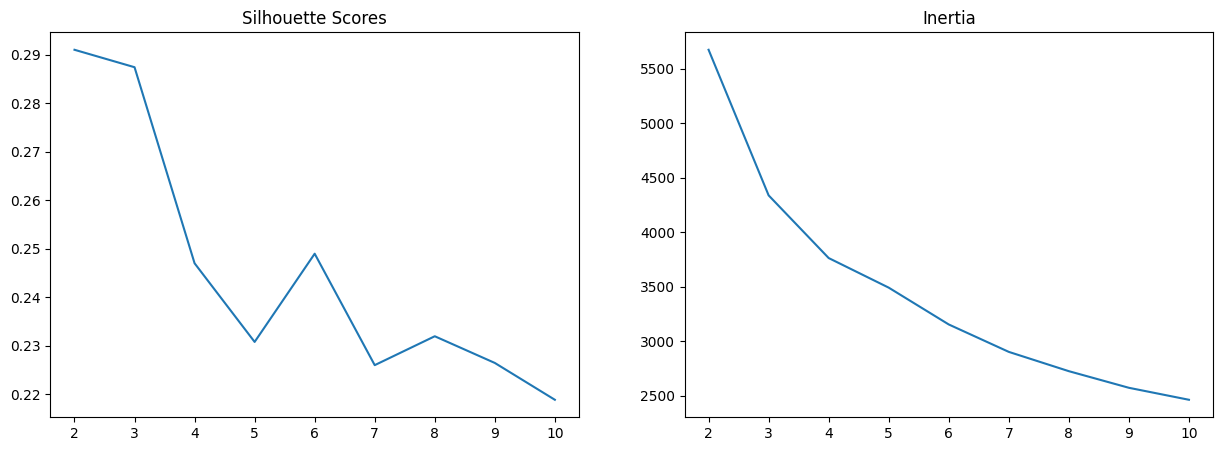

In [14]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(x_scaled)
  sils.append(silhouette_score(x_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

## The Silhouette Score remains high at 2 or 3, While the Inertia meets elbow at 3,4,5 >>> Choose the cluster of 3

In [15]:
# Refit KMeans with chosen clusters
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
kmeans.fit(x_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,2
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,2
4,47,1,31,253,9.308,8.908,0.0,7.2,0


In [25]:
agg_groups = df.groupby('cluster').describe().transpose()
agg_groups

cluster                        0           1           2
Age             count  147.00000  166.000000  537.000000
                mean    43.00000   31.891566   33.817505
                std      6.31697    8.031019    7.053912
                min     26.00000   20.000000   20.000000
                25%     39.00000   26.000000   29.000000
...                          ...         ...         ...
DebtIncomeRatio min      2.00000    0.900000    0.100000
                25%      7.70000    8.400000    4.400000
                50%     13.10000   13.200000    7.000000
                75%     17.85000   18.550000   10.500000
                max     41.30000   35.300000   24.600000

[64 rows x 3 columns]

In [26]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups


,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


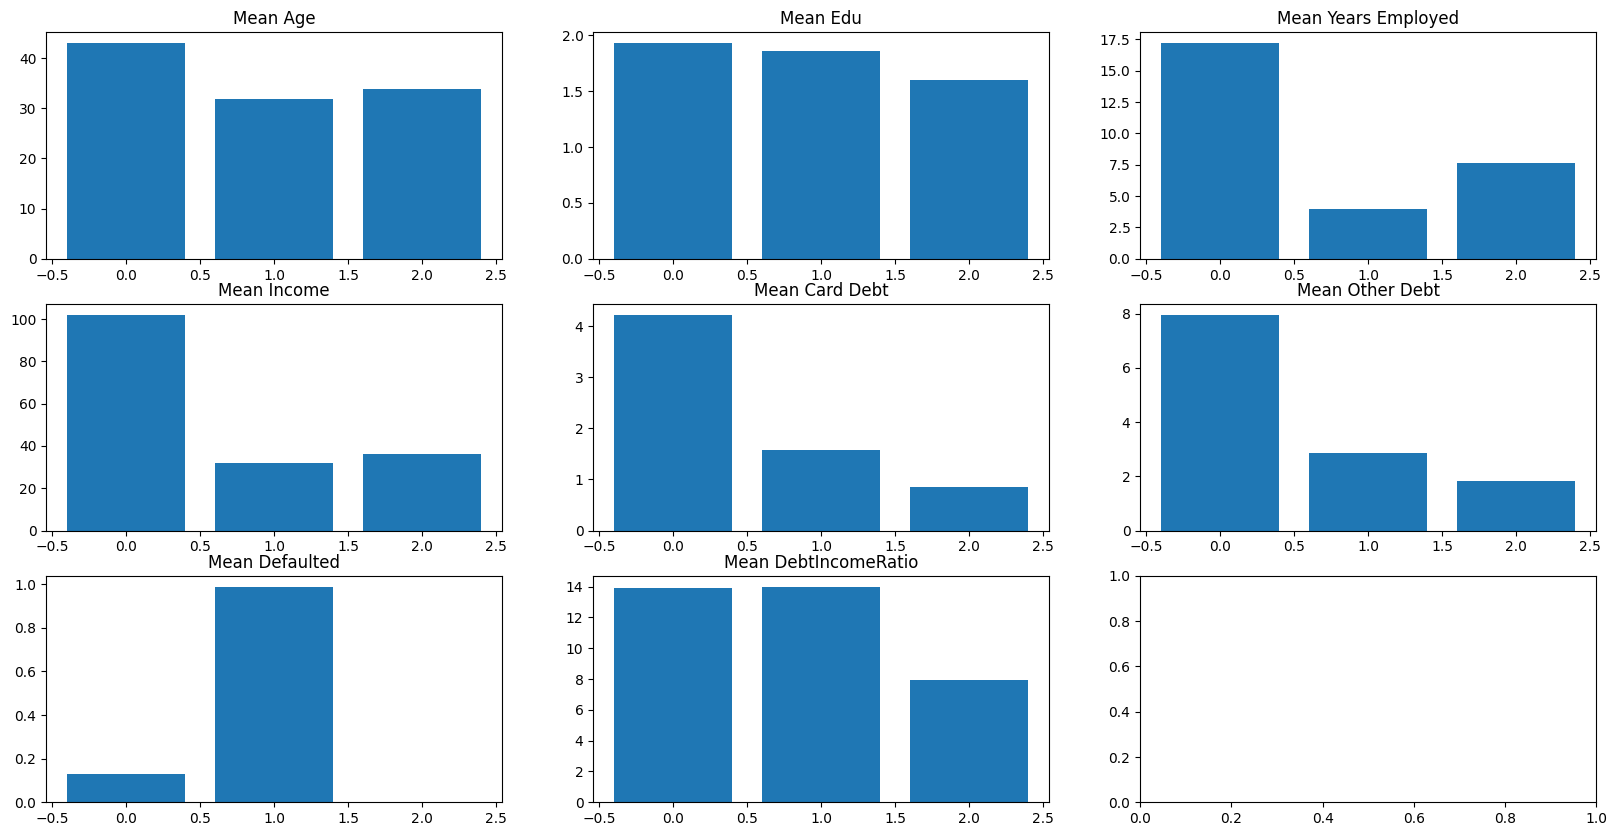

In [27]:
# Visualize means
fig, axes = plt.subplots(3,3, figsize = (20, 10))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

## Cluster 0 has the highest mean in 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', and 'Debt-Income Ratio', except for 'Defaulted'. In this cluster, individuals tend to have stable and high income, yet they also spend a lot of money. Cluster 1 has the lowest income and employment duration; however, the Debt-Income Ratio is similar to Cluster 0. The mean default rate is also the highest. Individuals in this cluster tend to earn less but spend a significant amount of money compared to their income. Cluster 2 earns similarly to Cluster 1, but there is a smaller Debt-Income Ratio, indicating less use of credit card products.



## For Cluster 0, the company can market cards with higher limits and luxury expenses. For Cluster 2, the company can market cards that stimulate buying.